Missing values after cleaning:
 id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
resetecg    0
thalach     0
exang       0
slope       0
ca          4
thal        2
num         0
dtype: int64

=== Q1: Feature Classification ===
Discrete Features: ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
Continuous Features: ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Feature that can be both: Age (recorded discretely but analyzed as continuous)

=== Q2: Correlations with Age ===
trestbps -> Spearman: 0.300, Kendall: 0.211
chol -> Spearman: 0.183, Kendall: 0.127
thalach -> Spearman: -0.393, Kendall: -0.277


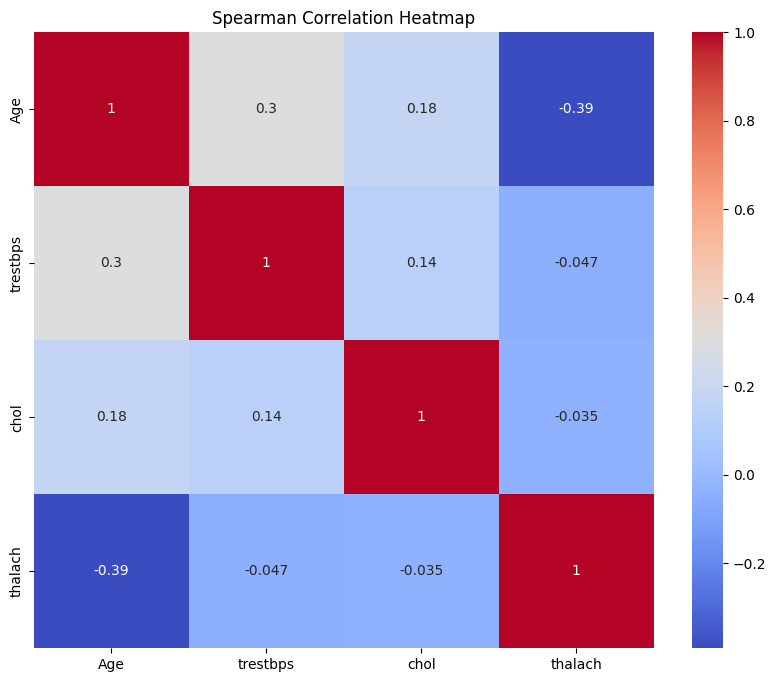


Variable most correlated with Age: thalach

=== Q3: Frequency plots ===


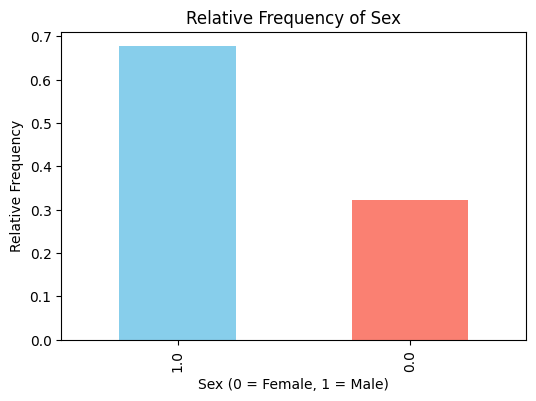


Observation: Majority of participants are male (Sex = 1).


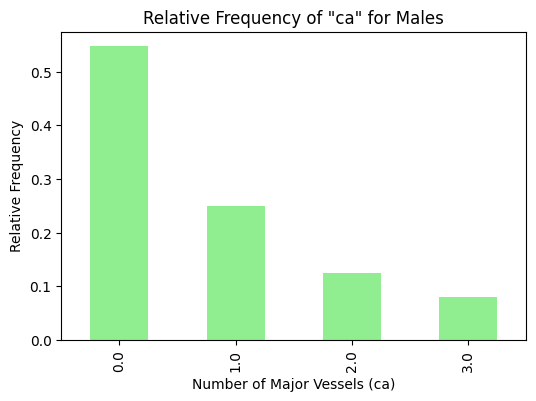


Observation: Among males, most have 0 major vessels colored.

=== Q4: Outlier Detection ===


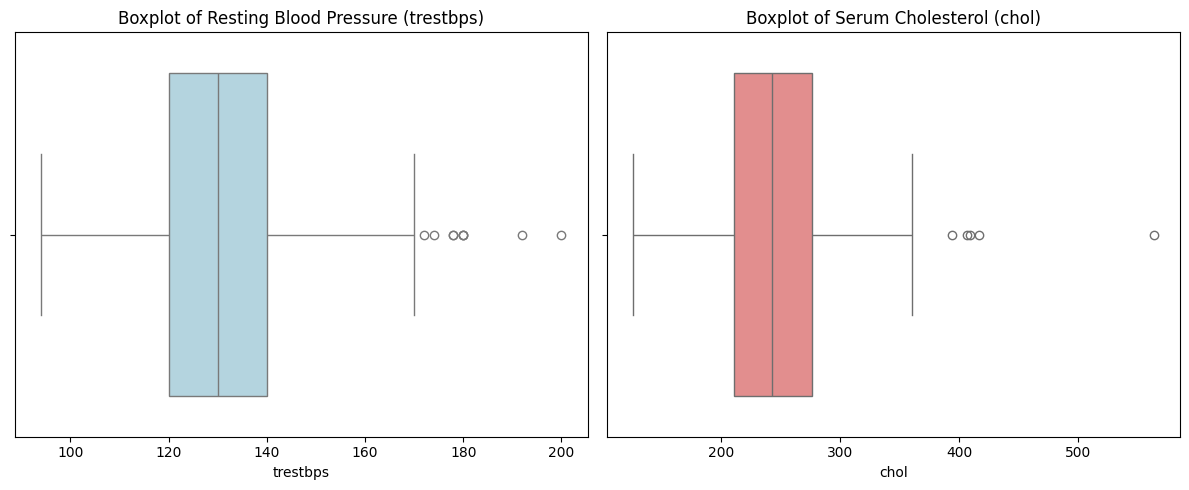


Observation: Outliers are visible as points beyond the whiskers in both features.


In [5]:
# Exercise 3 Solution: Understanding Your Dataset

# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr, kendalltau

# 2. Load the data
data = pd.read_csv('C:/Users/ahmed/Downloads/processedClevelandData.csv', sep=';')
feature_desc = pd.read_csv('C:/Users/ahmed/Downloads/featureDescription.csv', sep=';')

# 3. Full Dataset Cleaning
# Replace '?' with NaN for the entire dataset
data.replace('?', np.nan, inplace=True)

# Convert all columns to numeric if possible
data = data.apply(pd.to_numeric, errors='coerce')

# Drop duplicates if there are any
data.drop_duplicates(inplace=True)

# Check if cleaning worked
print("Missing values after cleaning:\n", data.isnull().sum())

# (If necessary) Drop rows with missing values
data_clean = data.dropna()

# 4. Question 1: Discrete and Continuous Features
print("\n=== Q1: Feature Classification ===")
discrete_features = ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
continuous_features = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']
print("Discrete Features:", discrete_features)
print("Continuous Features:", continuous_features)
print("Feature that can be both:", "Age (recorded discretely but analyzed as continuous)")

# 5. Question 2: Spearman's and Kendall's Correlation with Age
print("\n=== Q2: Correlations with Age ===")

variables_to_check = ['trestbps', 'chol', 'thalach']

# Function to calculate and print Spearman's and Kendall's correlation
def calculate_correlations(variable, age_data, dataset):
    spearman_corr, _ = spearmanr(age_data, dataset[variable])
    kendall_corr, _ = kendalltau(age_data, dataset[variable])
    print(f"{variable} -> Spearman: {spearman_corr:.3f}, Kendall: {kendall_corr:.3f}")

# Iterate over variables and calculate correlations
for var in variables_to_check:
    calculate_correlations(var, data_clean['Age'], data_clean)

# Heatmap of Spearman correlations
plt.figure(figsize=(10, 8))
corr_matrix = data_clean[['Age', 'trestbps', 'chol', 'thalach']].corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Spearman Correlation Heatmap')
plt.show()

# Find which variable is most correlated with Age
most_correlated = corr_matrix['Age'].drop('Age').abs().idxmax()
print(f"\nVariable most correlated with Age: {most_correlated}")

# 6. Question 3: Plot relative frequency of Sex and 'ca' for males
print("\n=== Q3: Frequency plots ===")

# Plot for 'Sex'
plt.figure(figsize=(6, 4))
sex_counts = data_clean['Sex'].value_counts(normalize=True)
sex_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Relative Frequency of Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Relative Frequency')
plt.show()

print("\nObservation: Majority of participants are male (Sex = 1).")

# Plot for 'ca' feature among males
male_data = data_clean[data_clean['Sex'] == 1]
plt.figure(figsize=(6, 4))
ca_counts = male_data['ca'].value_counts(normalize=True)
ca_counts.plot(kind='bar', color='lightgreen')
plt.title('Relative Frequency of "ca" for Males')
plt.xlabel('Number of Major Vessels (ca)')
plt.ylabel('Relative Frequency')
plt.show()

print("\nObservation: Among males, most have 0 major vessels colored.")

# 7. Question 4: Detect outliers in 'trestbps' and 'chol'
print("\n=== Q4: Outlier Detection ===")

# Boxplots for outlier detection
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=data_clean['trestbps'], color='lightblue')
plt.title('Boxplot of Resting Blood Pressure (trestbps)')

plt.subplot(1, 2, 2)
sns.boxplot(x=data_clean['chol'], color='lightcoral')
plt.title('Boxplot of Serum Cholesterol (chol)')

plt.tight_layout()
plt.show()

print("\nObservation: Outliers are visible as points beyond the whiskers in both features.")
